<a href="https://colab.research.google.com/github/Sachi-sunil/Salary_prediction/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive\ \(7\).zip

Archive:  archive (7).zip
  inflating: Employees.xlsx          


In [2]:
import pandas as pd

In [5]:
data = pd.read_excel('Employees.xlsx')
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [8]:
data.dropna(inplace=True)
data.isna().sum()

,0
No,0
First Name,0
Last Name,0
Gender,0
Start Date,0
Years,0
Department,0
Country,0
Center,0
Monthly Salary,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [9]:
data.duplicated().sum()

np.int64(0)

In [11]:
import matplotlib.pyplot as plt


Text(0, 0.5, '')

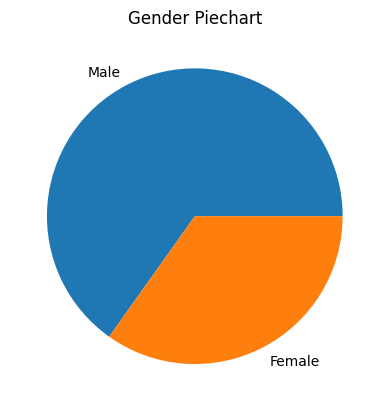

In [14]:
data['Gender'].value_counts().sort_values(ascending=False).plot(kind='pie')
plt.title("Gender Piechart")
plt.ylabel("")

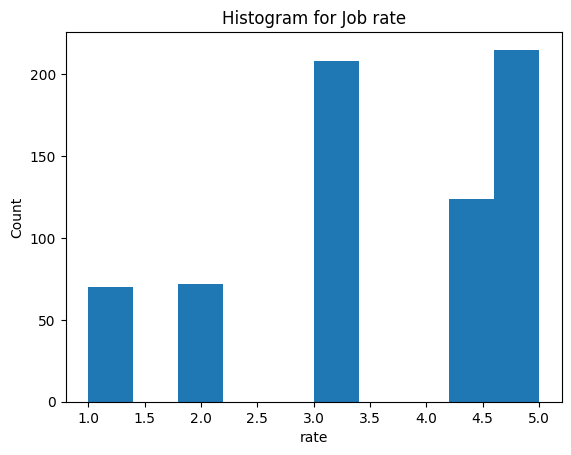

In [17]:
plt.hist(data["Job Rate"])
plt.title("Histogram for Job rate")
plt.xlabel("rate")
plt.ylabel("Count")
plt.show()

In [18]:
data["Job Rate"].describe()

,Job Rate
count,689.000000
mean,3.586357
std,1.350125
min,1.000000
25%,3.000000
50%,3.000000
75%,5.000000
max,5.000000


In [21]:
data.groupby('Department')['Annual Salary'].mean().sort_values(ascending=False)

,Annual Salary
Department,
Human Resources,30670.285714
Environmental Compliance,30097.846154
Training,28341.000000
Facilities/Engineering,27423.310345
Major Mfg Projects,26908.500000
IT,25374.300000
Research/Development,25183.200000
Quality Assurance,25007.104478
Green Building,24994.500000


In [22]:
data.groupby('Center')['Monthly Salary'].mean().sort_values(ascending=False)

,Monthly Salary
Center,
East,2274.021277
West,2068.672269
North,2064.811594
Main,2054.776892
South,1981.153846


In [23]:
data['Country'].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

In [26]:
data.groupby("Country")['Job Rate'].mean()

,Job Rate
Country,
Egypt,3.547493
Lebanon,3.272727
Saudi Arabia,3.783333
Syria,3.481132
United Arab Emirates,3.625000


In [27]:
data["Overtime Hours"].describe()

,Overtime Hours
count,689.000000
mean,13.702467
std,25.692049
min,0.000000
25%,3.000000
50%,7.000000
75%,10.000000
max,198.000000


In [28]:
data['Annual Salary'].describe()

,Annual Salary
count,689.000000
mean,24818.420900
std,9159.470878
min,8436.000000
25%,17232.000000
50%,24924.000000
75%,32184.000000
max,41400.000000


In [29]:
x= data[['Years','Job Rate']]
y=data['Annual Salary']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [33]:
len(x_train),len(y_test)

(138, 138)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
predslr = lr.predict(x_test)

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
mean_absolute_error(predslr,y_test)

7159.82130648713

In [40]:
import joblib
joblib.dump(lr,'linearmodel.pkl')

['linearmodel.pkl']